In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder, MEstimateEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [3]:
operations = pd.read_csv("Raw_data/Manufacturing_data (1).csv")
operations.head()

,Operations_ID,Product_ID,Product_Name,Product_Category,Production_Date,Production_Quantity,Quality_Metrics,Quantity_in_Stock,Quantity_Sold,Supplier_ID,...,Employee_ID,Employee_Name,Shift_Information,Maintenance_Type,Downtime_Duration,Energy_Consumption_Data,Production_Time,Downtime_Events,Employee_Rating,Downtime_Reason
0,1,2,Washing Machine,Home Appliances,5/30/2023,497,Passed,496,1,7,...,6,Taylor Davis,Morning Shift,Repairs,none,869.984961,4.509769,0,4,Material Shortage
1,2,5,Air Conditioners,Home Appliances,8/28/2023,437,Failed,84,353,9,...,9,Natasha Thomas,Morning Shift,Repairs,1.289021255,822.397123,8.881768,5,3,Human Error
2,3,5,Air Conditioners,Home Appliances,7/13/2023,246,Failed,59,187,10,...,10,Cheryl Nunez,Night Shift,Routine Maintenance,4.304791348,806.492455,9.637729,2,2,Technical Issues
3,4,2,Washing Machine,Home Appliances,8/7/2023,591,Passed,389,202,6,...,4,Megan Allen,Night Shift,Routine Maintenance,none,1164.227195,5.658093,0,1,Human Error
4,5,6,Microwave Ovens,Home Appliances,8/3/2023,470,Passed,360,110,8,...,10,Cheryl Nunez,Night Shift,Routine Maintenance,1.614071563,982.641175,5.823658,3,3,Technical Issues


EXPLORATORY DATA ANALYSIS


In [4]:
operations.columns=operations.columns.str.lower()

In [5]:
operations.duplicated().sum()
operations.isna().sum()

operations_id              0
product_id                 0
product_name               0
product_category           0
production_date            0
production_quantity        0
quality_metrics            0
quantity_in_stock          0
quantity_sold              0
supplier_id                0
supplier_name              0
lead_time                  0
employee_id                0
employee_name              0
shift_information          0
maintenance_type           0
downtime_duration          0
energy_consumption_data    0
production_time            0
downtime_events            0
employee_rating            0
downtime_reason            0
dtype: int64

In [6]:
operations.dtypes

operations_id                int64
product_id                   int64
product_name                object
product_category            object
production_date             object
production_quantity          int64
quality_metrics             object
quantity_in_stock            int64
quantity_sold                int64
supplier_id                  int64
supplier_name               object
lead_time                    int64
employee_id                  int64
employee_name               object
shift_information           object
maintenance_type            object
downtime_duration           object
energy_consumption_data    float64
production_time            float64
downtime_events              int64
employee_rating              int64
downtime_reason             object
dtype: object

In [7]:
operations["downtime_duration"].value_counts()

downtime_duration
none           169
1.289021255      1
1.039519901      1
3.820230342      1
4.743534892      1
              ... 
3.694276095      1
3.345114716      1
4.560611476      1
1.754051396      1
4.378620778      1
Name: count, Length: 832, dtype: int64

In [8]:
operations

,operations_id,product_id,product_name,product_category,production_date,production_quantity,quality_metrics,quantity_in_stock,quantity_sold,supplier_id,...,employee_id,employee_name,shift_information,maintenance_type,downtime_duration,energy_consumption_data,production_time,downtime_events,employee_rating,downtime_reason
0,1,2,Washing Machine,Home Appliances,5/30/2023,497,Passed,496,1,7,...,6,Taylor Davis,Morning Shift,Repairs,none,869.984961,4.509769,0,4,Material Shortage
1,2,5,Air Conditioners,Home Appliances,8/28/2023,437,Failed,84,353,9,...,9,Natasha Thomas,Morning Shift,Repairs,1.289021255,822.397123,8.881768,5,3,Human Error
2,3,5,Air Conditioners,Home Appliances,7/13/2023,246,Failed,59,187,10,...,10,Cheryl Nunez,Night Shift,Routine Maintenance,4.304791348,806.492455,9.637729,2,2,Technical Issues
3,4,2,Washing Machine,Home Appliances,8/7/2023,591,Passed,389,202,6,...,4,Megan Allen,Night Shift,Routine Maintenance,none,1164.227195,5.658093,0,1,Human Error
4,5,6,Microwave Ovens,Home Appliances,8/3/2023,470,Passed,360,110,8,...,10,Cheryl Nunez,Night Shift,Routine Maintenance,1.614071563,982.641175,5.823658,3,3,Technical Issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,Industrial Mixer,Industrial Machinery,8/5/2023,562,Passed,229,333,3,...,8,Sarah Lloyd,Afternoon Shift,Routine Maintenance,4.665417025,1056.001201,3.530673,4,2,Human Error
996,997,3,Industrial Mixer,Industrial Machinery,5/16/2023,223,Passed,222,1,3,...,10,Cheryl Nunez,Night Shift,Repairs,2.999226071,1093.333773,7.304735,2,4,Human Error
997,998,5,Air Conditioners,Home Appliances,7/24/2023,733,Passed,316,417,5,...,8,Sarah Lloyd,Afternoon Shift,Repairs,2.162981235,1225.055802,10.919937,3,5,Material Shortage
998,999,7,Industrial Cookers,Industrial Machinery,8/2/2023,521,Passed,336,185,3,...,8,Sarah Lloyd,Afternoon Shift,Repairs,3.699279353,1349.060657,7.079350,1,3,Material Shortage


In [9]:
operations["downtime_duration"]=operations["downtime_duration"].replace({"none":0})
operations["downtime_duration"]=operations["downtime_duration"].astype(float)


##Format to date_time 
operations["production_date"] = pd.to_datetime(operations["production_date"])

operations["year"] = operations["production_date"].dt.year
operations["month"] = operations["production_date"].dt.month
operations["day"] = operations["production_date"].dt.day

operations.drop(columns=["production_date"],inplace=True)
time_chart=operations.copy()

In [10]:
potential_categorical_from_numerical = operations.select_dtypes("number").loc[:, operations.select_dtypes("number").nunique() < 35]
potential_categorical_from_numerical.drop(columns={"lead_time","downtime_events"}, inplace=True)
potential_categorical_from_numerical

,product_id,supplier_id,employee_id,employee_rating,year,month,day
0,2,7,6,4,2023,5,30
1,5,9,9,3,2023,8,28
2,5,10,10,2,2023,7,13
3,2,6,4,1,2023,8,7
4,6,8,10,3,2023,8,3
...,...,...,...,...,...,...,...
995,3,3,8,2,2023,8,5
996,3,3,10,4,2023,5,16
997,5,5,8,5,2023,7,24
998,7,3,8,3,2023,8,2


In [11]:
## categorical Variables
operations_cat=pd.concat([operations.select_dtypes("object"),potential_categorical_from_numerical],axis=1)
operations_cat = operations_cat.join(operations['operations_id'])
operations_cat

,product_name,product_category,quality_metrics,supplier_name,employee_name,shift_information,maintenance_type,downtime_reason,product_id,supplier_id,employee_id,employee_rating,year,month,day,operations_id
0,Washing Machine,Home Appliances,Passed,Ferguson Inc,Taylor Davis,Morning Shift,Repairs,Material Shortage,2,7,6,4,2023,5,30,1
1,Air Conditioners,Home Appliances,Failed,Lawson-Herrera,Natasha Thomas,Morning Shift,Repairs,Human Error,5,9,9,3,2023,8,28,2
2,Air Conditioners,Home Appliances,Failed,Campbell-Wong,Cheryl Nunez,Night Shift,Routine Maintenance,Technical Issues,5,10,10,2,2023,7,13,3
3,Washing Machine,Home Appliances,Passed,"Hill, Thomas and Neal",Megan Allen,Night Shift,Routine Maintenance,Human Error,2,6,4,1,2023,8,7,4
4,Microwave Ovens,Home Appliances,Passed,"Adams, Murphy and Wilson",Cheryl Nunez,Night Shift,Routine Maintenance,Technical Issues,6,8,10,3,2023,8,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Industrial Mixer,Industrial Machinery,Passed,Hartman-Banks,Sarah Lloyd,Afternoon Shift,Routine Maintenance,Human Error,3,3,8,2,2023,8,5,996
996,Industrial Mixer,Industrial Machinery,Passed,Hartman-Banks,Cheryl Nunez,Night Shift,Repairs,Human Error,3,3,10,4,2023,5,16,997
997,Air Conditioners,Home Appliances,Passed,Hawkins-Miller,Sarah Lloyd,Afternoon Shift,Repairs,Material Shortage,5,5,8,5,2023,7,24,998
998,Industrial Cookers,Industrial Machinery,Passed,Hartman-Banks,Sarah Lloyd,Afternoon Shift,Repairs,Material Shortage,7,3,8,3,2023,8,2,999


In [12]:
## Numerical variables
operations_num = operations.drop(columns=operations_cat.columns)
operations_num

,production_quantity,quantity_in_stock,quantity_sold,lead_time,downtime_duration,energy_consumption_data,production_time,downtime_events
0,497,496,1,9,0.000000,869.984961,4.509769,0
1,437,84,353,6,1.289021,822.397123,8.881768,5
2,246,59,187,2,4.304791,806.492455,9.637729,2
3,591,389,202,10,0.000000,1164.227195,5.658093,0
4,470,360,110,9,1.614072,982.641175,5.823658,3
...,...,...,...,...,...,...,...,...
995,562,229,333,2,4.665417,1056.001201,3.530673,4
996,223,222,1,1,2.999226,1093.333773,7.304735,2
997,733,316,417,9,2.162981,1225.055802,10.919937,3
998,521,336,185,5,3.699279,1349.060657,7.079350,1


Univariate Analysis

In [13]:
## Measures of Centrality for production_quantity:
## Calculate the mean, median, and mode of quantity produced.
mean_=round(operations_num["production_quantity"].mean(),1)
median_=operations_num["production_quantity"].median()
mode_=operations_num["production_quantity"].mode()[0]
mean_, median_, mode_

(564.5, 527.5, 362)

The average quantity of products produced is 564.5 while half of the quantity of produced products per operation is lower than 527.5 or higher than it. 
Majority of the production process produced 362 products per operations.
The mean quantity of products produced is greater than the mode indicating a cluster of products quantity produced per operations around 362 with some high production number recorded recorded. The median number of production being lower to the mean also confirms this.
There is suspicion of positive skewness in the quantity of production data. 

In [14]:
## Measures of Dispersion:
## Determine the variance, standard deviation, range, and interquartile range for quantity produced.
variance_price = round(operations_num["production_quantity"].var(),1)
std_dev_price = round(operations_num["production_quantity"].std(),1)
min_price = operations_num["production_quantity"].min()
max_price = operations_num["production_quantity"].max()
range_price = max_price - min_price
quantiles_price = operations_num["production_quantity"].quantile([0.25, 0.75])
interquartile_range=list(quantiles_price)

variance_price, std_dev_price, min_price, max_price, range_price,interquartile_range

(52189.7, 228.5, 117, 1000, 883, [381.75, 750.25])

The quantity produced for each operations really varies widely from one another due to the high Standard deviation,variance and range values

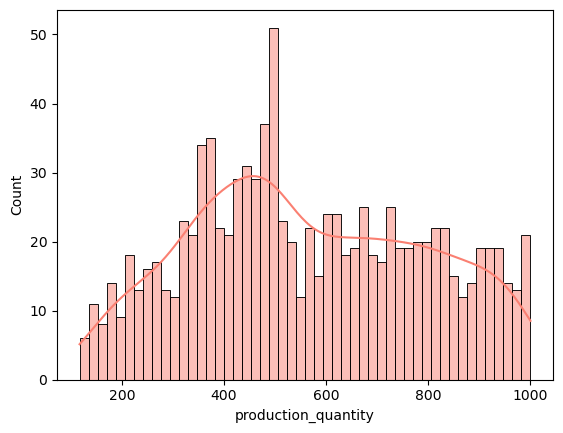

In [15]:
## Visualizations:
sns.histplot(operations_num["production_quantity"], kde=True, bins=50, color="salmon")
plt.show()

In [16]:
## Shape of the Distribution:
## Calculate the skewness and kurtosis of quantity produced.
skewness_price = operations_num["production_quantity"].skew()
kurtosis_price = operations_num["production_quantity"].kurtosis()

skewness_price, kurtosis_price

(0.1256623179738871, -0.9758059889625783)

The positive skewed value shows slight positive skewness to the right which is negligible.
The negative kurtosis value indicates thinner or lighter tails and so the distribution generates fewer and less extreme outliers than a normal distribution would.

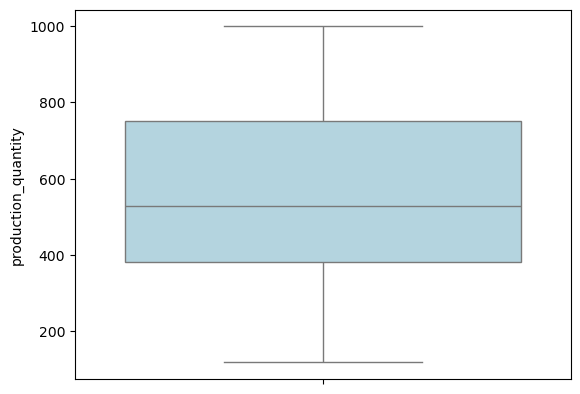

In [17]:
##
sns.boxplot(data = operations_num["production_quantity"], color="lightblue")
plt.show()

From the Boxplot is shows no outlier in the quantity of products produced hence the symmetrical nature of the data.

In [18]:
# Generate a frequency table for weekstatus
##Calculating the frequency table
frequency_table_status = operations_cat['product_name'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table_status = operations_cat['product_name'].value_counts(normalize=True)

frequency_table_status, proportion_table_status


(product_name
 Industrial Mixer      156
 Air Conditioners      148
 Refrigerator          147
 Diesel Generator      145
 Microwave Ovens       137
 Industrial Cookers    135
 Washing Machine       132
 Name: count, dtype: int64,
 product_name
 Industrial Mixer      0.156
 Air Conditioners      0.148
 Refrigerator          0.147
 Diesel Generator      0.145
 Microwave Ovens       0.137
 Industrial Cookers    0.135
 Washing Machine       0.132
 Name: proportion, dtype: float64)

C:\Users\HP\AppData\Local\Temp\ipykernel_32268\4144470299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportion_table_status.index, y=proportion_table_status.values, palette="coolwarm")
C:\Users\HP\AppData\Local\Temp\ipykernel_32268\4144470299.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


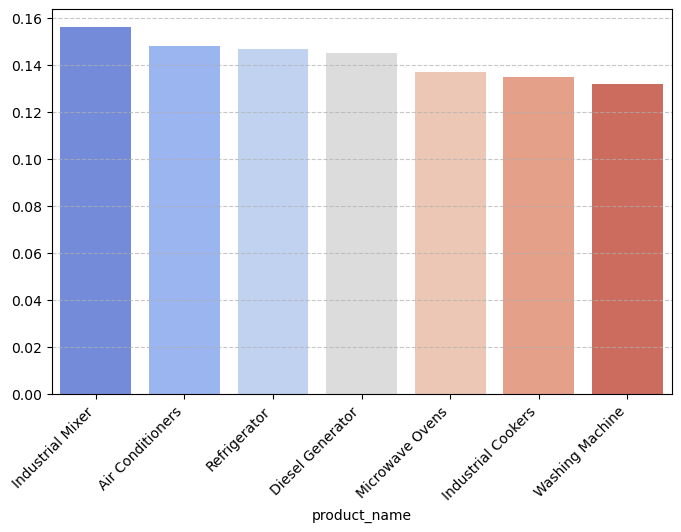

In [19]:
plt.figure(figsize=(8, 5))
ax = plt.gca()
sns.barplot(x=proportion_table_status.index, y=proportion_table_status.values, palette="coolwarm")
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Production of industrial mixer was more in the period covered by the production data.

In [20]:
# Generate a frequency table for shift information
##Calculating the frequency table
frequency_table_shift = operations_cat['shift_information'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table_shift = operations_cat['shift_information'].value_counts(normalize=True)

frequency_table_shift, proportion_table_shift

(shift_information
 Night Shift        369
 Afternoon Shift    330
 Morning Shift      301
 Name: count, dtype: int64,
 shift_information
 Night Shift        0.369
 Afternoon Shift    0.330
 Morning Shift      0.301
 Name: proportion, dtype: float64)

C:\Users\HP\AppData\Local\Temp\ipykernel_32268\331455350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportion_table_shift.index, y=proportion_table_shift.values, palette="coolwarm")
C:\Users\HP\AppData\Local\Temp\ipykernel_32268\331455350.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


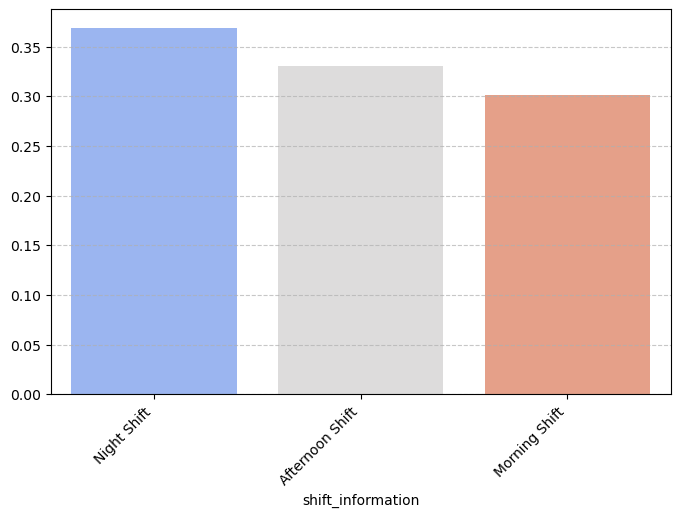

In [21]:
plt.figure(figsize=(8, 5))
ax = plt.gca()
sns.barplot(x=proportion_table_shift.index, y=proportion_table_shift.values, palette="coolwarm")
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Most production activities happen during the night shift with the least in the morning shift.

Bivariate Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_32268\2214671475.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=time_chart, x='month', y='production_quantity', ci=None)


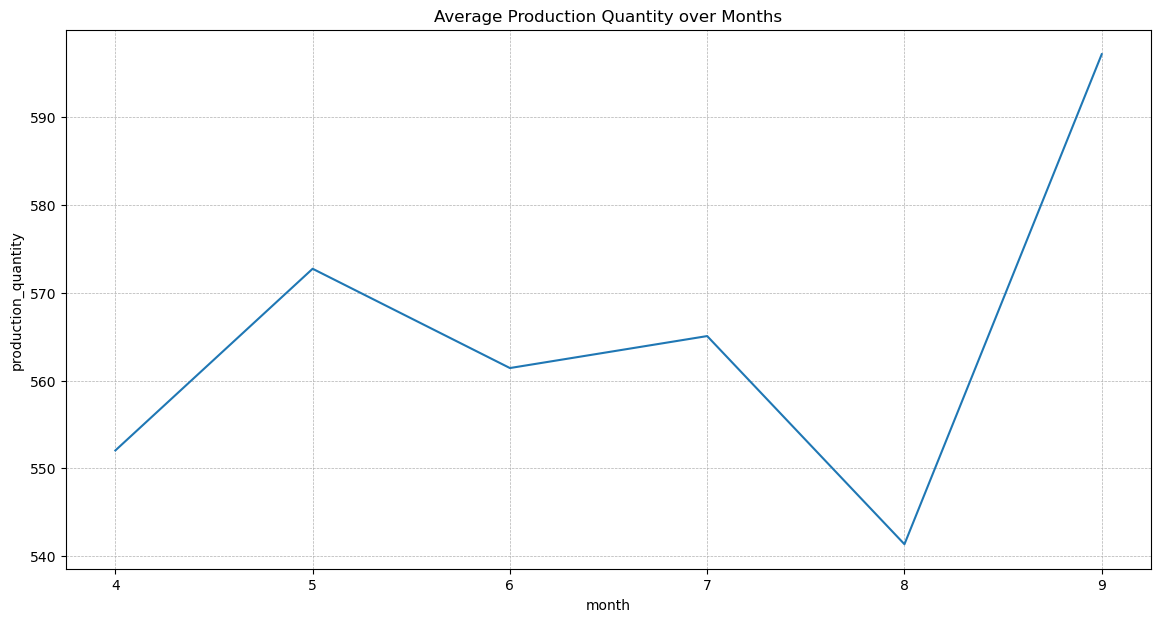

In [22]:
# Plotting a line graph to visualize the trend of average 'production quantity' across different months'
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_chart, x='month', y='production_quantity', ci=None)
plt.title('Average Production Quantity over Months')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

There is a sharp spike in production quantity in April and August 2023

In [23]:
## Part 1: Analyzing product name trends across downtime reason


## Crosstab Analysis:

##Create a crosstab between the load_type and day_of_week.
crosstab_result = pd.crosstab(operations_cat['product_name'], operations_cat['downtime_reason'])

crosstab_result

downtime_reason,Human Error,Material Shortage,Technical Issues
product_name,,,
Air Conditioners,48,55,45
Diesel Generator,43,53,49
Industrial Cookers,46,47,42
Industrial Mixer,64,52,40
Microwave Ovens,51,37,49
Refrigerator,50,49,48
Washing Machine,44,54,34


In [24]:
## Statistical Tests:
## Conduct a Chi-square test to determine if the product name distribution is independent of downtime reason. Using a p-value of 5%
from scipy.stats import chi2_contingency

# Chi-square test for 'product_name' and 'downtime_reason'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

## A p-value=0.4 which is greater than 0.05, indicates a independent relationship between the two variables and so there is no existence of relationship between observed and expected.

# So we cannot conclude that the likelihood of the various downtime reasons across the different products is different. 

(11.957797316341946, 0.4490749370847299)

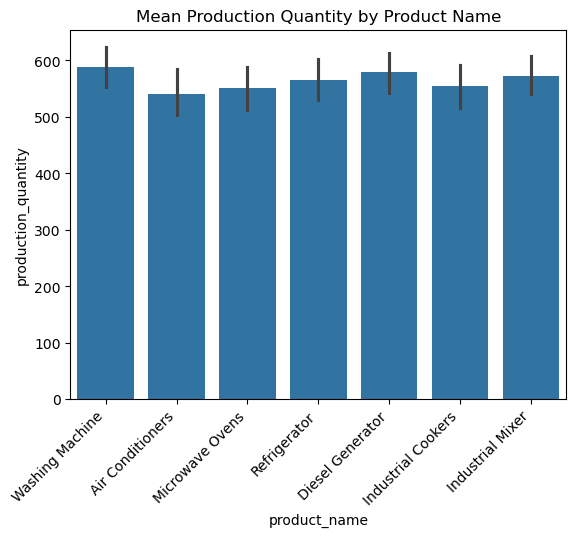

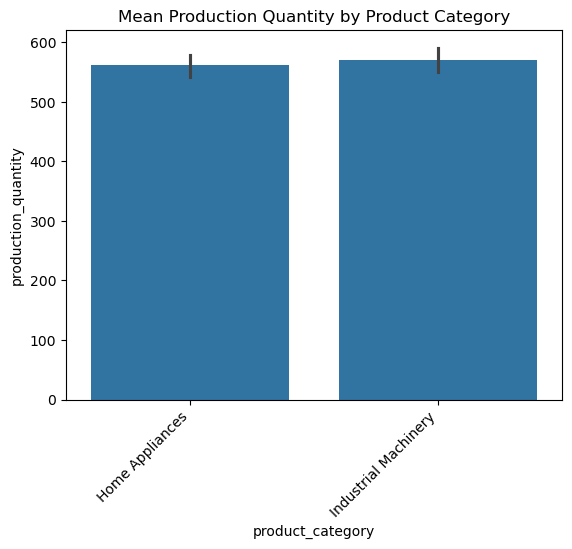

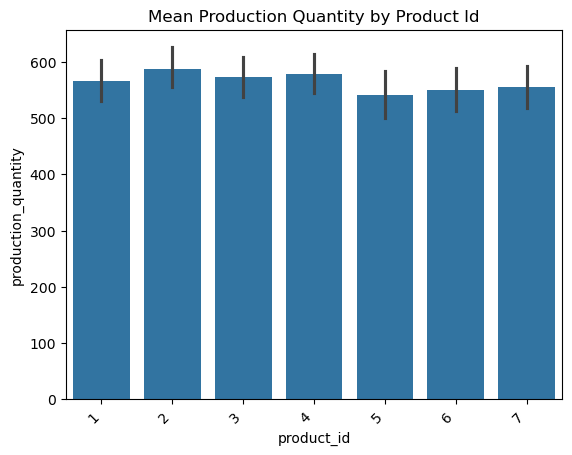

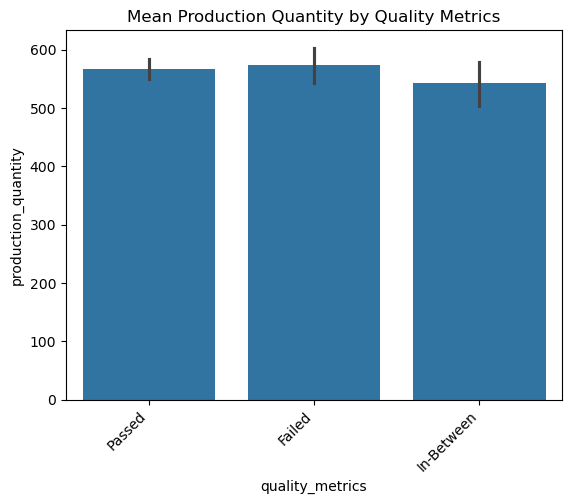

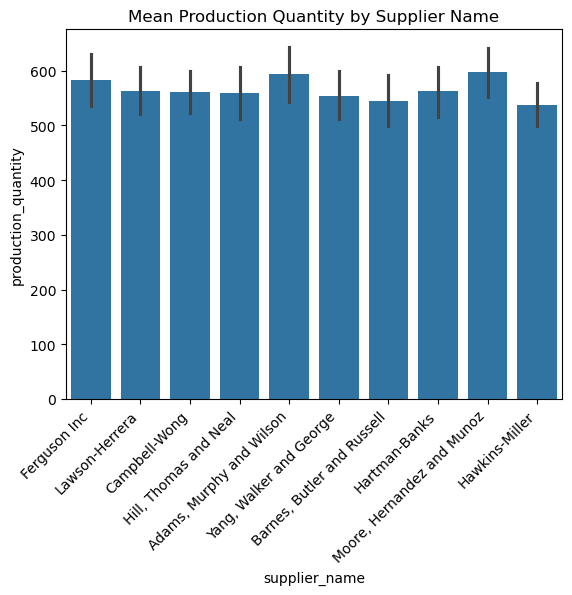

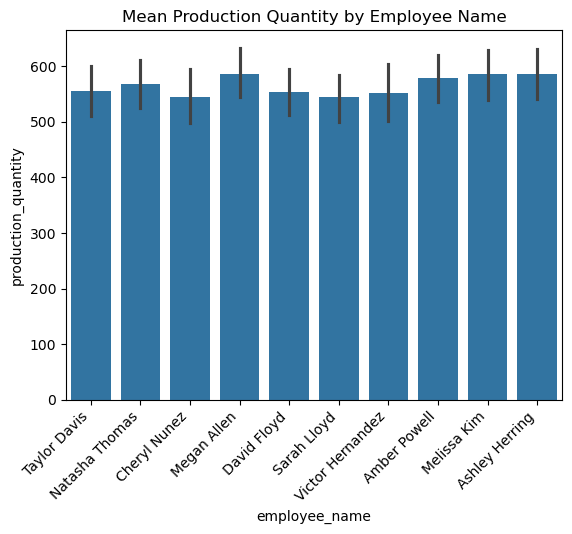

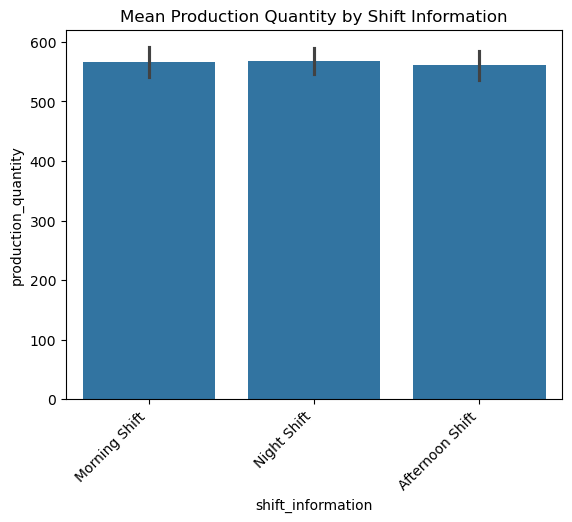

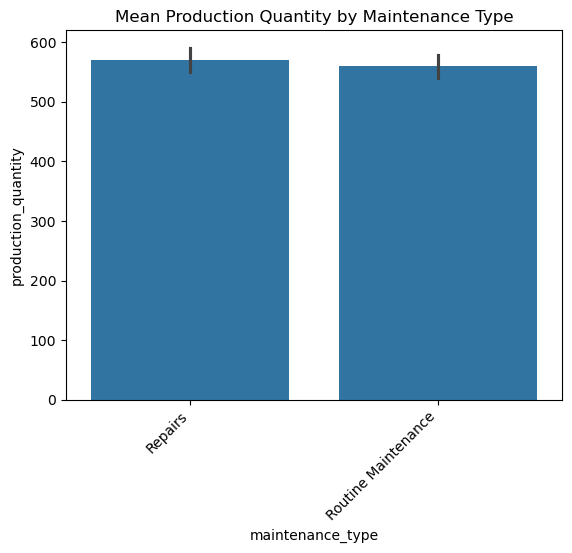

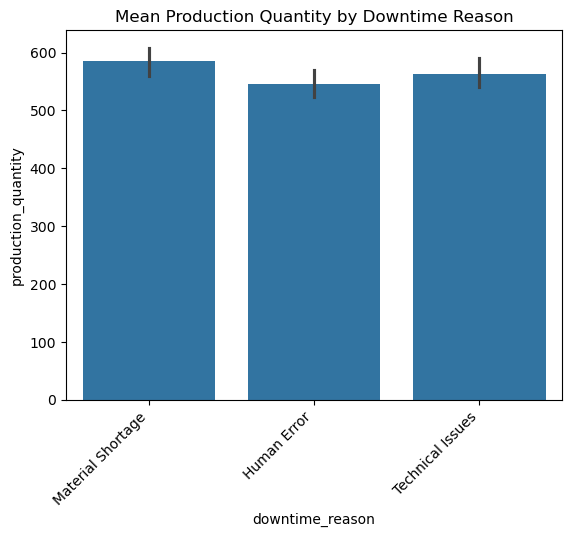

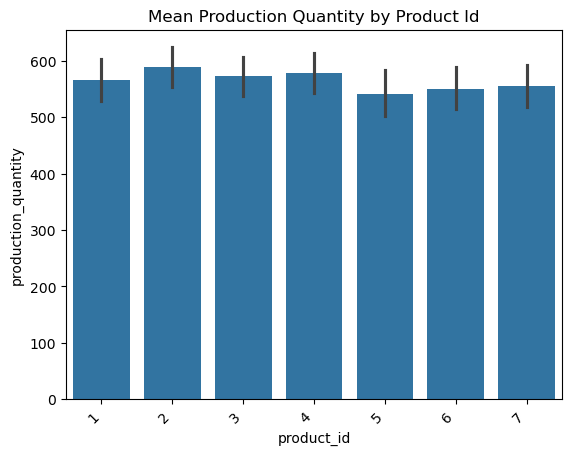

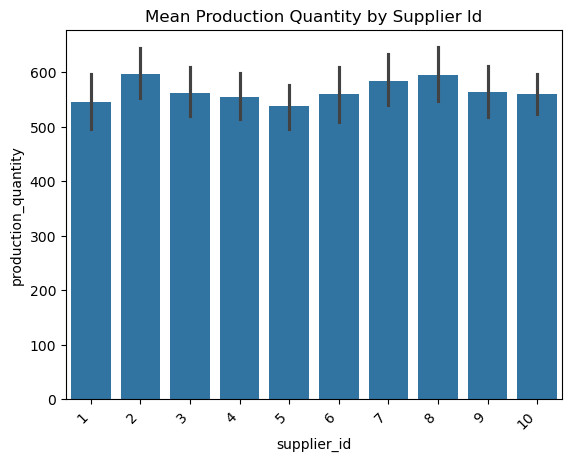

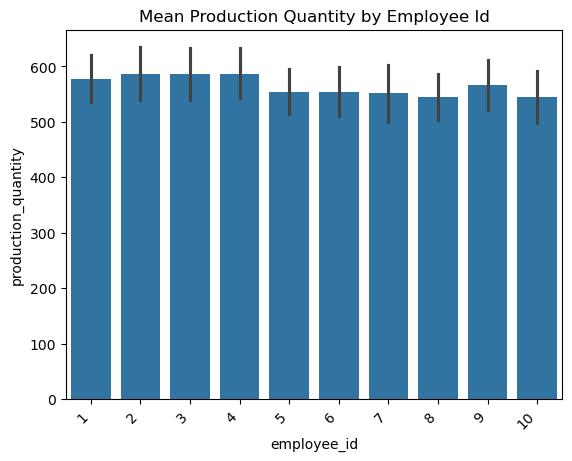

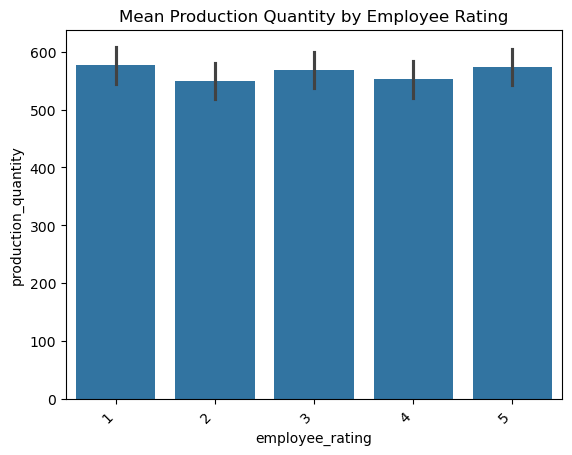

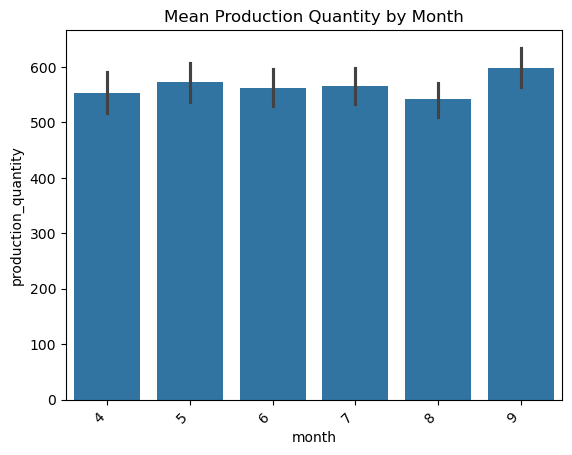

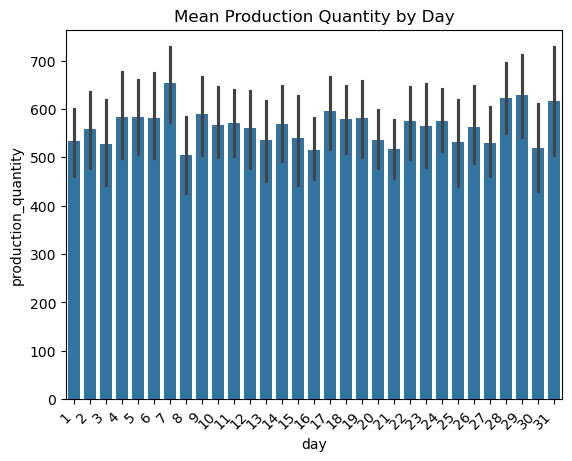

In [25]:
# Plotting a bar plot to visualize the average 'production_quantity'' for each 'product_name', using the "coolwarm" color palette
col=["product_name","product_category","product_id","quality_metrics","supplier_name","employee_name","shift_information","maintenance_type","downtime_reason","product_id","supplier_id","employee_id","employee_rating","month","day"]
for i in col:
    plt.title(f'Mean Production Quantity by {i.replace("_", " ").title()}')
    sns.barplot(data=operations, x=i, y='production_quantity', estimator="mean")
    plt.xticks(rotation=45, ha='right')

    plt.show()

In [26]:
operations

,operations_id,product_id,product_name,product_category,production_quantity,quality_metrics,quantity_in_stock,quantity_sold,supplier_id,supplier_name,...,maintenance_type,downtime_duration,energy_consumption_data,production_time,downtime_events,employee_rating,downtime_reason,year,month,day
0,1,2,Washing Machine,Home Appliances,497,Passed,496,1,7,Ferguson Inc,...,Repairs,0.000000,869.984961,4.509769,0,4,Material Shortage,2023,5,30
1,2,5,Air Conditioners,Home Appliances,437,Failed,84,353,9,Lawson-Herrera,...,Repairs,1.289021,822.397123,8.881768,5,3,Human Error,2023,8,28
2,3,5,Air Conditioners,Home Appliances,246,Failed,59,187,10,Campbell-Wong,...,Routine Maintenance,4.304791,806.492455,9.637729,2,2,Technical Issues,2023,7,13
3,4,2,Washing Machine,Home Appliances,591,Passed,389,202,6,"Hill, Thomas and Neal",...,Routine Maintenance,0.000000,1164.227195,5.658093,0,1,Human Error,2023,8,7
4,5,6,Microwave Ovens,Home Appliances,470,Passed,360,110,8,"Adams, Murphy and Wilson",...,Routine Maintenance,1.614072,982.641175,5.823658,3,3,Technical Issues,2023,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,Industrial Mixer,Industrial Machinery,562,Passed,229,333,3,Hartman-Banks,...,Routine Maintenance,4.665417,1056.001201,3.530673,4,2,Human Error,2023,8,5
996,997,3,Industrial Mixer,Industrial Machinery,223,Passed,222,1,3,Hartman-Banks,...,Repairs,2.999226,1093.333773,7.304735,2,4,Human Error,2023,5,16
997,998,5,Air Conditioners,Home Appliances,733,Passed,316,417,5,Hawkins-Miller,...,Repairs,2.162981,1225.055802,10.919937,3,5,Material Shortage,2023,7,24
998,999,7,Industrial Cookers,Industrial Machinery,521,Passed,336,185,3,Hartman-Banks,...,Repairs,3.699279,1349.060657,7.079350,1,3,Material Shortage,2023,8,2


In [27]:
operations.columns

Index(['operations_id', 'product_id', 'product_name', 'product_category',
       'production_quantity', 'quality_metrics', 'quantity_in_stock',
       'quantity_sold', 'supplier_id', 'supplier_name', 'lead_time',
       'employee_id', 'employee_name', 'shift_information', 'maintenance_type',
       'downtime_duration', 'energy_consumption_data', 'production_time',
       'downtime_events', 'employee_rating', 'downtime_reason', 'year',
       'month', 'day'],
      dtype='object')

FEATURE ENGINEERING

One Hot Encoding

In [28]:
operations=pd.get_dummies(operations,columns = ["product_id","supplier_id","employee_id","downtime_reason"])
operations

,operations_id,product_name,product_category,production_quantity,quality_metrics,quantity_in_stock,quantity_sold,supplier_name,lead_time,employee_name,...,employee_id_4,employee_id_5,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues
0,1,Washing Machine,Home Appliances,497,Passed,496,1,Ferguson Inc,9,Taylor Davis,...,False,False,True,False,False,False,False,False,True,False
1,2,Air Conditioners,Home Appliances,437,Failed,84,353,Lawson-Herrera,6,Natasha Thomas,...,False,False,False,False,False,True,False,True,False,False
2,3,Air Conditioners,Home Appliances,246,Failed,59,187,Campbell-Wong,2,Cheryl Nunez,...,False,False,False,False,False,False,True,False,False,True
3,4,Washing Machine,Home Appliances,591,Passed,389,202,"Hill, Thomas and Neal",10,Megan Allen,...,True,False,False,False,False,False,False,True,False,False
4,5,Microwave Ovens,Home Appliances,470,Passed,360,110,"Adams, Murphy and Wilson",9,Cheryl Nunez,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Industrial Mixer,Industrial Machinery,562,Passed,229,333,Hartman-Banks,2,Sarah Lloyd,...,False,False,False,False,True,False,False,True,False,False
996,997,Industrial Mixer,Industrial Machinery,223,Passed,222,1,Hartman-Banks,1,Cheryl Nunez,...,False,False,False,False,False,False,True,True,False,False
997,998,Air Conditioners,Home Appliances,733,Passed,316,417,Hawkins-Miller,9,Sarah Lloyd,...,False,False,False,False,True,False,False,False,True,False
998,999,Industrial Cookers,Industrial Machinery,521,Passed,336,185,Hartman-Banks,5,Sarah Lloyd,...,False,False,False,False,True,False,False,False,True,False


Cyclical Encoding

In [29]:
## Cyclical encoding for month and day columns
# M = 12 for months
M = 12 

# Transformation on "month" column in operations data
operations['month_sin'] = np.sin(2 * np.pi * operations['month'] / M)
operations['month_cos'] = np.cos(2 * np.pi * operations['month'] / M)

# D = 7 for days
D=7
# Transformation on "day" column in operations data
operations['month_sin'] = np.sin(2 * np.pi * operations['month'] / D)
operations['month_cos'] = np.cos(2 * np.pi * operations['month'] / D)

# Drop the original Day and month feature from operations dataset
operations = operations.drop(columns={'day',"month"}, axis=1)

FEATURE SELECTION

In [30]:
## These columns are dropped due to their very minimal effect on the target variable "production quantity"
operations.drop(columns=["quality_metrics","operations_id","year","product_category","shift_information","maintenance_type","product_name","supplier_name","employee_name"],inplace=True)
operations

,production_quantity,quantity_in_stock,quantity_sold,lead_time,downtime_duration,energy_consumption_data,production_time,downtime_events,employee_rating,product_id_1,...,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues,month_sin,month_cos
0,497,496,1,9,0.000000,869.984961,4.509769,0,4,False,...,True,False,False,False,False,False,True,False,-9.749279e-01,-0.222521
1,437,84,353,6,1.289021,822.397123,8.881768,5,3,False,...,False,False,False,True,False,True,False,False,7.818315e-01,0.623490
2,246,59,187,2,4.304791,806.492455,9.637729,2,2,False,...,False,False,False,False,True,False,False,True,-2.449294e-16,1.000000
3,591,389,202,10,0.000000,1164.227195,5.658093,0,1,False,...,False,False,False,False,False,True,False,False,7.818315e-01,0.623490
4,470,360,110,9,1.614072,982.641175,5.823658,3,3,False,...,False,False,False,False,True,False,False,True,7.818315e-01,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,562,229,333,2,4.665417,1056.001201,3.530673,4,2,False,...,False,False,True,False,False,True,False,False,7.818315e-01,0.623490
996,223,222,1,1,2.999226,1093.333773,7.304735,2,4,False,...,False,False,False,False,True,True,False,False,-9.749279e-01,-0.222521
997,733,316,417,9,2.162981,1225.055802,10.919937,3,5,False,...,False,False,True,False,False,False,True,False,-2.449294e-16,1.000000
998,521,336,185,5,3.699279,1349.060657,7.079350,1,3,False,...,False,False,True,False,False,False,True,False,7.818315e-01,0.623490


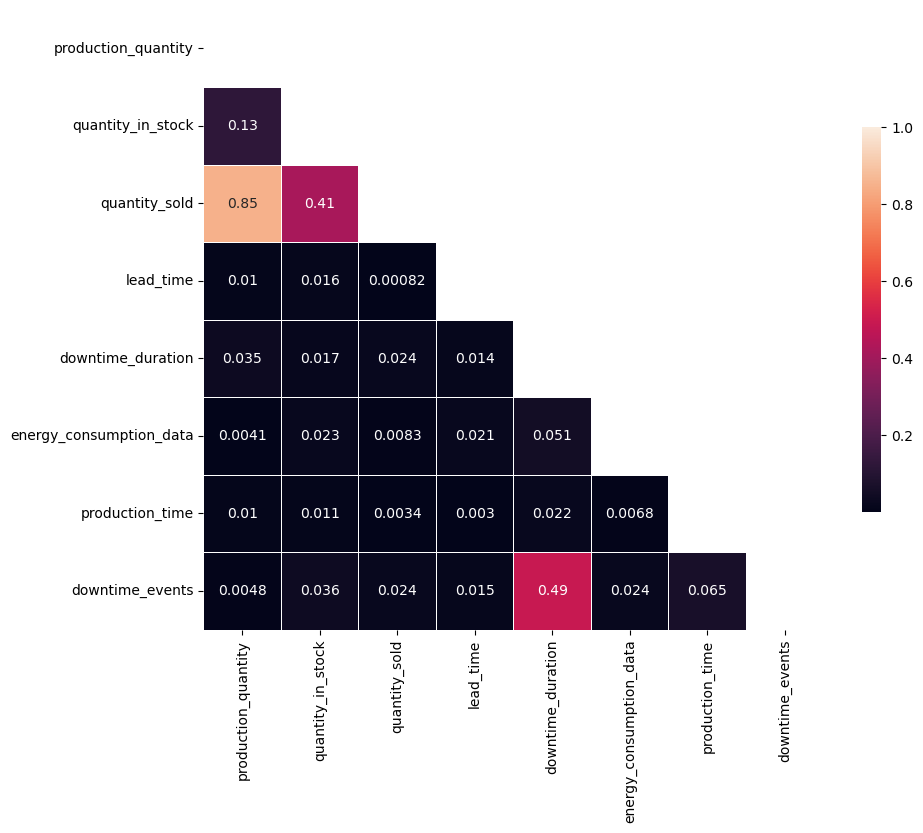

In [31]:
### Numerical Features Selection
import matplotlib.pyplot as plt
import seaborn as sns


corr=np.abs(operations_num.corr(method="pearson"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [32]:
corr_d=pd.DataFrame(columns=["r","p"])
for col in operations_num:
    r,p=stats.pearsonr(operations_num.production_quantity,operations_num[col])
    corr_d.loc[col]=[r, p]
corr_d

,r,p
production_quantity,1.000000,0.000000e+00
quantity_in_stock,0.125011,7.376540e-05
quantity_sold,0.851058,1.780209e-281
lead_time,0.010364,7.434093e-01
downtime_duration,-0.035485,2.622534e-01
energy_consumption_data,0.004133,8.961344e-01
production_time,0.010217,7.469304e-01
downtime_events,-0.004799,8.795360e-01


From the p-values all correlation coefficient values prove to be significant.
Using a benchmark of R>0.84 as highly correlated and R<0.1 as lowly correlated
We drop all features except quantity_in_stock with R=0.13

In [33]:
operations.drop(columns=["downtime_duration","energy_consumption_data","production_time","lead_time","downtime_events","quantity_in_stock"],inplace=True)
operations

,production_quantity,quantity_sold,employee_rating,product_id_1,product_id_2,product_id_3,product_id_4,product_id_5,product_id_6,product_id_7,...,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues,month_sin,month_cos
0,497,1,4,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,-9.749279e-01,-0.222521
1,437,353,3,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,7.818315e-01,0.623490
2,246,187,2,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,-2.449294e-16,1.000000
3,591,202,1,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,7.818315e-01,0.623490
4,470,110,3,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,7.818315e-01,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,562,333,2,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,7.818315e-01,0.623490
996,223,1,4,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,-9.749279e-01,-0.222521
997,733,417,5,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,-2.449294e-16,1.000000
998,521,185,3,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,7.818315e-01,0.623490


Train/Test Split

In [34]:
features = operations.drop(columns = ["production_quantity"])
target = operations["production_quantity"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [36]:
X_train

,quantity_sold,employee_rating,product_id_1,product_id_2,product_id_3,product_id_4,product_id_5,product_id_6,product_id_7,supplier_id_1,...,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues,month_sin,month_cos
687,608,1,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,-2.449294e-16,1.000000
500,382,5,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,-7.818315e-01,0.623490
332,66,5,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,-4.338837e-01,-0.900969
979,1,2,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,-9.749279e-01,-0.222521
817,231,1,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,-4.338837e-01,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,241,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-4.338837e-01,-0.900969
192,473,2,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-4.338837e-01,-0.900969
629,764,4,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,-9.749279e-01,-0.222521
559,1,2,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,-9.749279e-01,-0.222521


In [37]:
X_test

,quantity_sold,employee_rating,product_id_1,product_id_2,product_id_3,product_id_4,product_id_5,product_id_6,product_id_7,supplier_id_1,...,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues,month_sin,month_cos
993,109,1,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,-7.818315e-01,0.623490
859,325,3,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,-9.749279e-01,-0.222521
298,1,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,7.818315e-01,0.623490
553,327,3,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,9.749279e-01,-0.222521
672,133,5,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,336,4,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,-2.449294e-16,1.000000
722,315,3,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-4.338837e-01,-0.900969
215,516,5,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-2.449294e-16,1.000000
653,305,1,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,-9.749279e-01,-0.222521


Normalization

In [38]:
## Create an instance of the normalizer and fit to the encoded training data.
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


Transforming our training and testing data using the scalar

In [39]:
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns = features.columns)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns = features.columns)


display(X_train_norm)
display(X_test_norm)


,quantity_sold,employee_rating,product_id_1,product_id_2,product_id_3,product_id_4,product_id_5,product_id_6,product_id_7,supplier_id_1,...,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues,month_sin,month_cos
0,0.683559,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000
1,0.429054,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.099031,0.801938
2,0.073198,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.277479,0.000000
3,0.000000,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.356896
4,0.259009,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.277479,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.270270,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.277479,0.000000
796,0.531532,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.277479,0.000000
797,0.859234,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.356896
798,0.000000,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.356896


,quantity_sold,employee_rating,product_id_1,product_id_2,product_id_3,product_id_4,product_id_5,product_id_6,product_id_7,supplier_id_1,...,employee_id_6,employee_id_7,employee_id_8,employee_id_9,employee_id_10,downtime_reason_Human Error,downtime_reason_Material Shortage,downtime_reason_Technical Issues,month_sin,month_cos
0,0.121622,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.099031,0.801938
1,0.364865,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.356896
2,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.900969,0.801938
3,0.367117,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.356896
4,0.148649,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.377252,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,1.000000
196,0.353604,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.277479,0.000000
197,0.579955,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000
198,0.342342,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.356896


MODELS

In [40]:
rf=RandomForestRegressor()
br=BayesianRidge()

In [41]:
def apply_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print('')

    print("TRAIN SCORES")
    pred_train = model.predict(x_train)
    print("MAE ", mean_absolute_error(y_train, pred_train))
    print("RMSE ", root_mean_squared_error(y_train, pred_train))
    print("R2 score ", r2_score(y_train, pred_train))
    print('')

    print("TEST SCORES")
    pred = model.predict(x_test)
    print("MAE ", mean_absolute_error(y_test, pred))
    print("RMSE ", root_mean_squared_error(y_test, pred))
    print("R2 score ", r2_score(y_test, pred))
    print('')


In [42]:
apply_model(rf,X_train_norm,X_test_norm,y_train,y_test)


TRAIN SCORES
MAE  38.5952625
RMSE  47.042658504011015
R2 score  0.9557244647881068

TEST SCORES
MAE  110.40234999999998
RMSE  131.9710503159689
R2 score  0.713178882016998



In [43]:
apply_model(br,X_train_norm,X_test_norm,y_train,y_test)


TRAIN SCORES
MAE  97.05860810020687
RMSE  116.74920371361304
R2 score  0.7272982278123876

TEST SCORES
MAE  108.54917911394183
RMSE  128.50813419950242
R2 score  0.728033749201833



HYPERPARAMETER TUNING

Bayesian Ridge Model

In [44]:
ada_reg = AdaBoostRegressor(BayesianRidge())


In [45]:
param_grid = {
    'estimator__alpha_1': [1e-6, 1e-5, 1e-4],  # Prior shape parameter for lambda
    'estimator__alpha_2': [1e-6, 1e-5, 1e-4],  # Prior inverse scale parameter for lambda
    'estimator__lambda_1': [1e-6, 1e-5, 1e-4], # Prior shape parameter for alpha (noise precision)
    'estimator__lambda_2': [1e-6, 1e-5, 1e-4], # Prior inverse scale parameter for alpha (noise precision)
    # Tuning the outer AdaBoost model:
    'n_estimators': [10, 50],
    'learning_rate': [0.1, 1.0]
}

In [46]:
grid_search = GridSearchCV(
    estimator=ada_reg,
    param_grid=param_grid,
    cv=5,                                     # 5-fold cross-validation
    scoring='neg_mean_squared_error',         
    verbose=0,                                # Suppress verbose output for clean execution
    n_jobs=-1                                 # Use all available CPU cores
    
)



In [47]:
print("Starting Grid Search for Regression...")
grid_search.fit(X_train_norm, y_train)
print("Grid Search complete.")

Starting Grid Search for Regression...
Grid Search complete.


In [48]:
# View Results
print("\n## Grid Search Results ##")

# The best combination of hyperparameters found during the search
print(f"Best Hyperparameters Found: {grid_search.best_params_}")


## Grid Search Results ##
Best Hyperparameters Found: {'estimator__alpha_1': 0.0001, 'estimator__alpha_2': 1e-05, 'estimator__lambda_1': 1e-06, 'estimator__lambda_2': 1e-06, 'learning_rate': 1.0, 'n_estimators': 10}


In [49]:
# The best model trained using the optimal hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model

,estimator,BayesianRidge...alpha_2=1e-05)
,n_estimators,10
,learning_rate,1.0
,loss,'linear'
,random_state,None
,max_iter,300
,tol,0.001
,alpha_1,0.0001
,alpha_2,1e-05
,lambda_1,1e-06
,lambda_2,1e-06


In [50]:
# 7. Evaluate the Final Model on Train/Test Data
print("TRAIN SCORES")
pred_train = best_rf_model.predict(X_train_norm)
print("MAE ", mean_absolute_error(y_train, pred_train))
print("RMSE ", root_mean_squared_error(y_train, pred_train))
print("R2 score ", r2_score(y_train, pred_train))
print("")

print("TEST SCORES")
pred = best_rf_model.predict(X_test_norm)
print("MAE ", mean_absolute_error(y_test, pred))
print("RMSE ", root_mean_squared_error(y_test, pred))
print("R2 score ", r2_score(y_test, pred))

TRAIN SCORES
MAE  98.1881987102818
RMSE  117.1841862445861
R2 score  0.7252623855010039

TEST SCORES
MAE  109.25782866058663
RMSE  129.1094322176916
R2 score  0.725482698890007


Random Forest Model

In [51]:
ada_reg = AdaBoostRegressor(RandomForestRegressor())

In [52]:
param_grid = {
    # n_estimators: Number of trees in the forest. A higher number usually means better
    # performance but longer training time. We test a few small values.
    'estimator__n_estimators': [50, 100, 200],
    
    # max_depth: Maximum number of levels in each decision tree. Controls overfitting.
    # None means nodes are expanded until all leaves are pure or contain min_samples_leaf samples.
    'estimator__max_depth': [5, 10, None], 
    
    # min_samples_split: Minimum number of data points placed in a node before the node is split.
    # We test 2 (default) and 5.
    'estimator__min_samples_split': [2, 5],

    # Tuning the outer AdaBoost model:
    'n_estimators': [10, 50],
    'learning_rate': [0.1, 1.0]
}

In [53]:
# Initialize Grid Search with 5-Fold Cross-Validation on the training data
grid_2 = GridSearchCV(
    estimator=ada_reg, 
    param_grid=param_grid, 
    scoring='r2', 
    cv=5,
    verbose=0, 
    n_jobs=-1
)

In [54]:
print("Starting Grid Search for Regression...")
grid_2.fit(X_train_norm, y_train)
print("Grid Search complete.")

Starting Grid Search for Regression...
Grid Search complete.


In [55]:
# View Results
print("\n## Grid Search Results ##")

# The best combination of hyperparameters found during the search
print(f"Best Hyperparameters Found: {grid_2.best_params_}")


## Grid Search Results ##
Best Hyperparameters Found: {'estimator__max_depth': 5, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100, 'learning_rate': 0.1, 'n_estimators': 50}


In [56]:
# The best model trained using the optimal hyperparameters
best2_rf_model = grid_2.best_estimator_


In [57]:
best2_rf_model

,estimator,RandomForestR...mples_split=5)
,n_estimators,50
,learning_rate,0.1
,loss,'linear'
,random_state,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [58]:
# 7. Evaluate the Final Model on Train/Test Data
print("TRAIN SCORES")
pred_train = best2_rf_model.predict(X_train_norm)
print("MAE ", mean_absolute_error(y_train, pred_train))
print("RMSE ", root_mean_squared_error(y_train, pred_train))
print("R2 score ", r2_score(y_train, pred_train))
print("")

print("TEST SCORES")
pred = best2_rf_model.predict(X_test_norm)
print("MAE ", mean_absolute_error(y_test, pred))
print("RMSE ", root_mean_squared_error(y_test, pred))
print("R2 score ", r2_score(y_test, pred))

TRAIN SCORES
MAE  84.78736295348389
RMSE  100.47551764405745
R2 score  0.7980236076712485

TEST SCORES
MAE  104.85386150053658
RMSE  123.88685251482956
R2 score  0.7472424036351397


FEATURE IMPORTANCE of OPTIMAL RANDOM FOREST MODEL

In [59]:
importances = best2_rf_model.feature_importances_


In [60]:
# Display the importances along with feature names
importance_series = pd.Series(importances, index=X_train_norm.columns)
print(importance_series.sort_values(ascending=False))

quantity_sold                        0.895790
employee_rating                      0.011648
month_sin                            0.010054
month_cos                            0.007313
product_id_5                         0.004817
supplier_id_7                        0.004639
downtime_reason_Material Shortage    0.003864
product_id_1                         0.003681
supplier_id_3                        0.003503
employee_id_1                        0.003289
employee_id_5                        0.003141
downtime_reason_Human Error          0.003116
supplier_id_2                        0.002899
supplier_id_5                        0.002859
product_id_6                         0.002833
employee_id_8                        0.002589
product_id_7                         0.002508
employee_id_10                       0.002248
product_id_2                         0.002180
supplier_id_6                        0.002128
product_id_4                         0.002100
employee_id_3                     

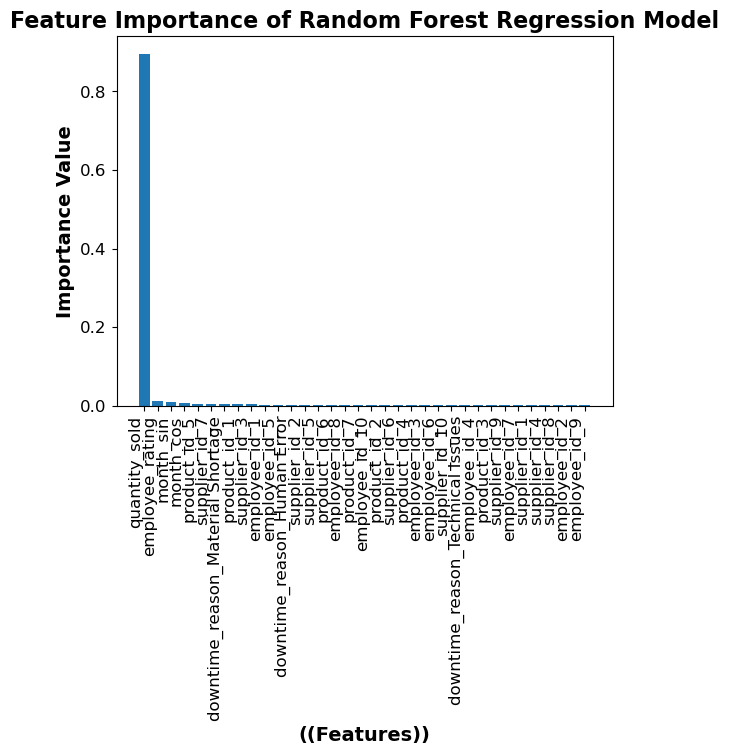

In [62]:
feature_names = X_train_norm.columns
sorted_indices = np.argsort(np.abs(importances))[::-1]

plt.bar([feature_names[i] for i in sorted_indices], importances[sorted_indices])
plt.xlabel('((Features))', fontsize=14, fontweight='bold')
plt.ylabel('Importance Value', fontsize=14, fontweight='bold')
plt.title('Feature Importance of Random Forest Regression Model', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('importance.svg', dpi=300, bbox_inches='tight')
plt.show()

The feature "quantity_sold" is the most important feature with employee_rating, month_sin and month_cos columns are topping the low important features.   